# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [18]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
trait_values_dict = {}

trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

In [4]:
focus_names = ["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"]
focus_codes = ["1.2.1", "1.3.1", "1.4.1", "2.1.1", "2.3.1"]
df_names = ["WIKI_ESP", "WIKI_DE"]

In [5]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 0.15, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

In [6]:
results_dict = {}

## Regex

In [7]:
df_results_regex = pd.read_excel("Results//Regex_Simple_Results.xlsx") 

## Logistic Regression

In [8]:
df_results_lr = pd.read_excel("Results//LR_Bow_Results.xlsx")

## Encoders

In [9]:
df_results_Encoders = pd.read_excel("Results//Encoder_Results.xlsx")

## Group Results

In [10]:
df_results_full = pd.concat([df_results_regex, df_results_lr, df_results_Encoders])
df_results_full = df_results_full[df_results_full["Trait"]==df_results_full["Trait Value"]].reset_index().drop("index", axis = 1)

In [37]:
df_results_full.to_excel("Results/NonEnglishCategoricalTraitClassification_Full_Results.xlsx", index = False)

In [12]:
# Calculate per average per database per model
average_rows = []
for dataset in ["WIKI_ESP", "WIKI_DE"]:
    for model in ["Regex", "Logistic Regression", "DistilBERT", "Multilingual-DistilBERT", "Spanish-BERT", "German-BERT"]:
        metric_averages = []
        print(dataset, model)
        for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
            avg = 0
            for trait in ["Growth Form", "Life Form"]:
                df_subset = df_results_full[(df_results_full["Train Dataset"]==dataset)*
                                            (df_results_full["Test Dataset"]==dataset)*
                                            (df_results_full["Model"]==model)*
                                            (df_results_full["Trait Value"]==trait)]
                
                avg += df_subset[metric].values[0]/2
            metric_averages.append(avg)
        average_rows.append([dataset, dataset, "Average", "Average"] + metric_averages + [model, model])

WIKI_ESP Regex
WIKI_ESP Logistic Regression
WIKI_ESP DistilBERT
WIKI_ESP Multilingual-DistilBERT
WIKI_ESP Spanish-BERT
WIKI_ESP German-BERT
WIKI_DE Regex
WIKI_DE Logistic Regression
WIKI_DE DistilBERT
WIKI_DE Multilingual-DistilBERT
WIKI_DE Spanish-BERT
WIKI_DE German-BERT


In [13]:
df_results_full = pd.concat([df_results_full, pd.DataFrame(average_rows, columns = df_results_full.columns)])

In [14]:
df_results_full

,Train Dataset,Test Dataset,Trait,Trait Value,Accuracy,Precision,Recall,F1-Score,Model,Representation
0,WIKI_ESP,WIKI_ESP,Growth Form,Growth Form,0.707333,0.491721,0.218992,0.283353,Regex,Regex_Simple
1,WIKI_DE,WIKI_DE,Growth Form,Growth Form,0.741251,0.818630,0.425663,0.479671,Regex,Regex_Simple
2,WIKI_ESP,WIKI_ESP,Life Form,Life Form,0.800000,0.000000,0.000000,0.000000,Regex,Regex_Simple
3,WIKI_DE,WIKI_DE,Life Form,Life Form,0.805634,0.662745,0.049593,0.089631,Regex,Regex_Simple
4,WIKI_ESP,WIKI_ESP,Growth Form,Growth Form,0.807000,0.756534,0.760734,0.758564,Logistic Regression,Bag of Words
5,WIKI_ESP,WIKI_ESP,Life Form,Life Form,0.673913,0.622649,0.610743,0.615316,Logistic Regression,Bag of Words
6,WIKI_DE,WIKI_DE,Growth Form,Growth Form,0.850258,0.798898,0.789399,0.793905,Logistic Regression,Bag of Words
7,WIKI_DE,WIKI_DE,Life Form,Life Form,0.741784,0.692756,0.701024,0.695282,Logistic Regression,Bag of Words
8,WIKI_ESP,WIKI_ESP,Growth Form,Growth Form,0.850563,0.820488,0.807822,0.813639,DistilBERT,NaN
9,WIKI_DE,WIKI_DE,Growth Form,Growth Form,0.863558,0.820741,0.827731,0.823429,DistilBERT,NaN


# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_86892\2544749969.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


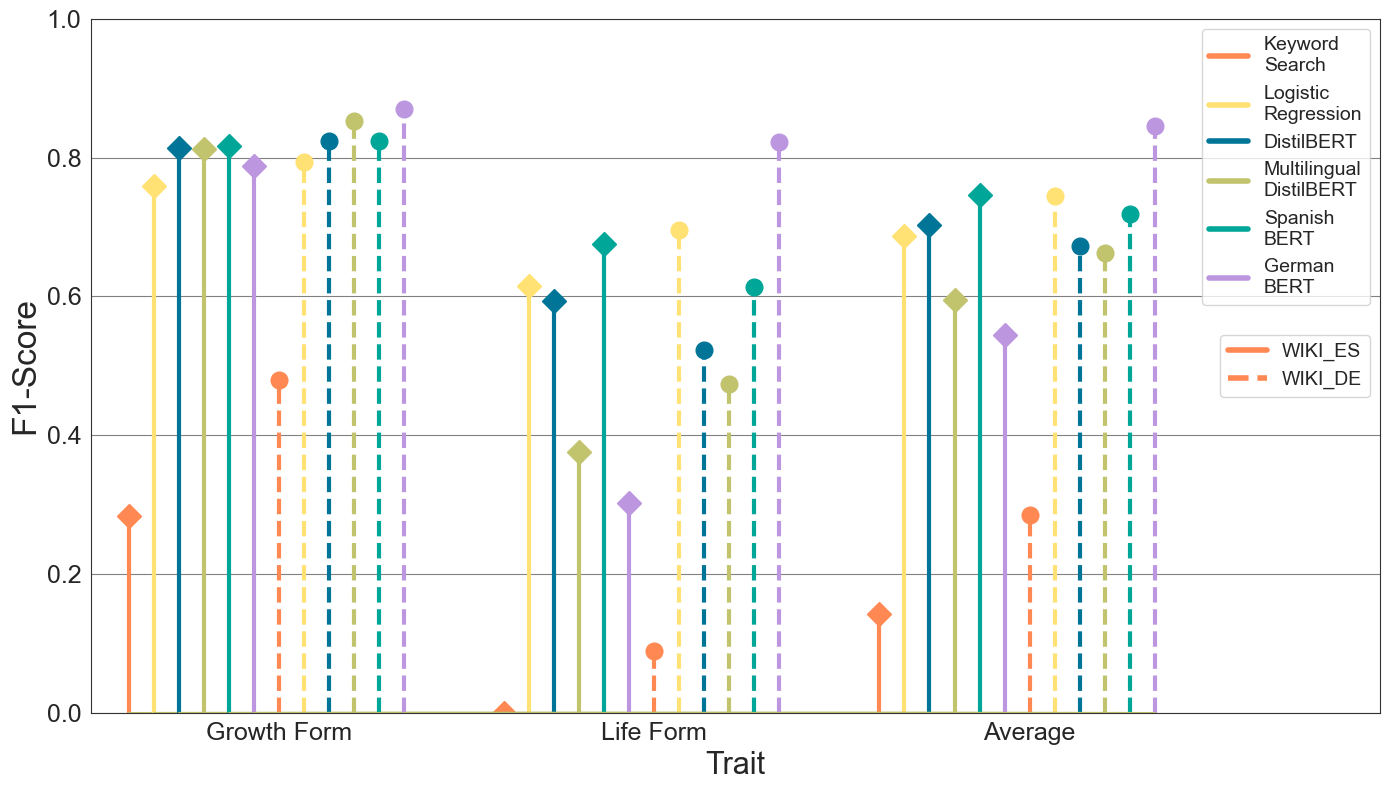

In [27]:
for i, metric in enumerate(["F1-Score"]):

    fig, axes  = plt.subplots(figsize=(14,8), nrows = 1)
    start = 0
    for j, model in enumerate(["Regex", "Logistic Regression", "DistilBERT", "Multilingual-DistilBERT", "Spanish-BERT", "German-BERT"]):
        for k, dataset in enumerate(["WIKI_ESP", "WIKI_DE"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)*df_results_full["Trait Value"].apply(lambda x: x in focus_names + ["Average"])]
            if(dataset=="WIKI_ESP"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(dataset=="WIKI_DE"):
                (markers, stemlines, baseline) = plt.stem(start + 6 + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 1
    
    axes.set_xticks(np.arange(6, 45, 15))
    axes.set_xticklabels(["Growth Form", "Life Form", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Trait", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    if(i==0):
        traits = [mlines.Line2D([], [], color=color_palette[i], marker='', ls='-', linewidth = 4, label=focus_name) for i, focus_name in enumerate(["Keyword\nSearch", "Logistic\nRegression", "DistilBERT", "Multilingual\nDistilBERT", "Spanish\nBERT", "German\nBERT"])]
        datasets = [mlines.Line2D([], [], color=color_palette[0], marker='', ls='-', markersize = 10, linewidth = 4, label="WIKI_ES"), mlines.Line2D([], [], color=color_palette[0], marker='', ls='--', markersize = 10, linewidth = 4, label="WIKI_DE")]
        legend1 = plt.legend(handles = datasets, fontsize = 14, loc = "center right")
        plt.legend(handles=traits, fontsize = 14, loc = "upper right")
        plt.gca().add_artist(legend1)
        # plt.legend()

    plt.xlim(-1.5, 50)
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_139152\988776433.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


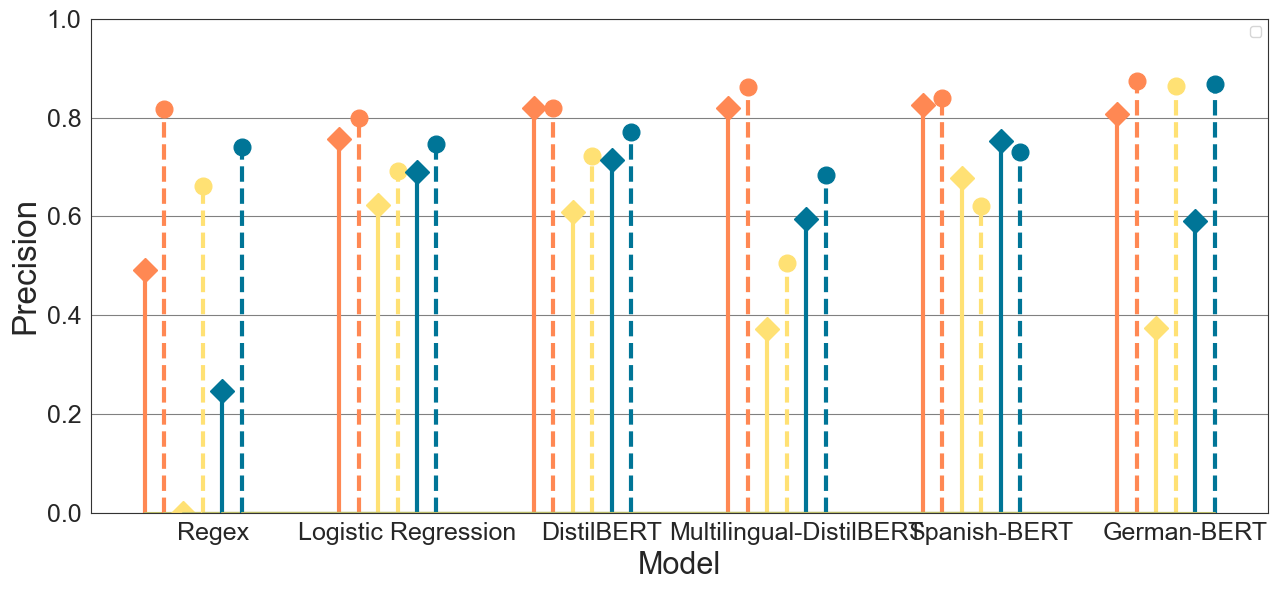

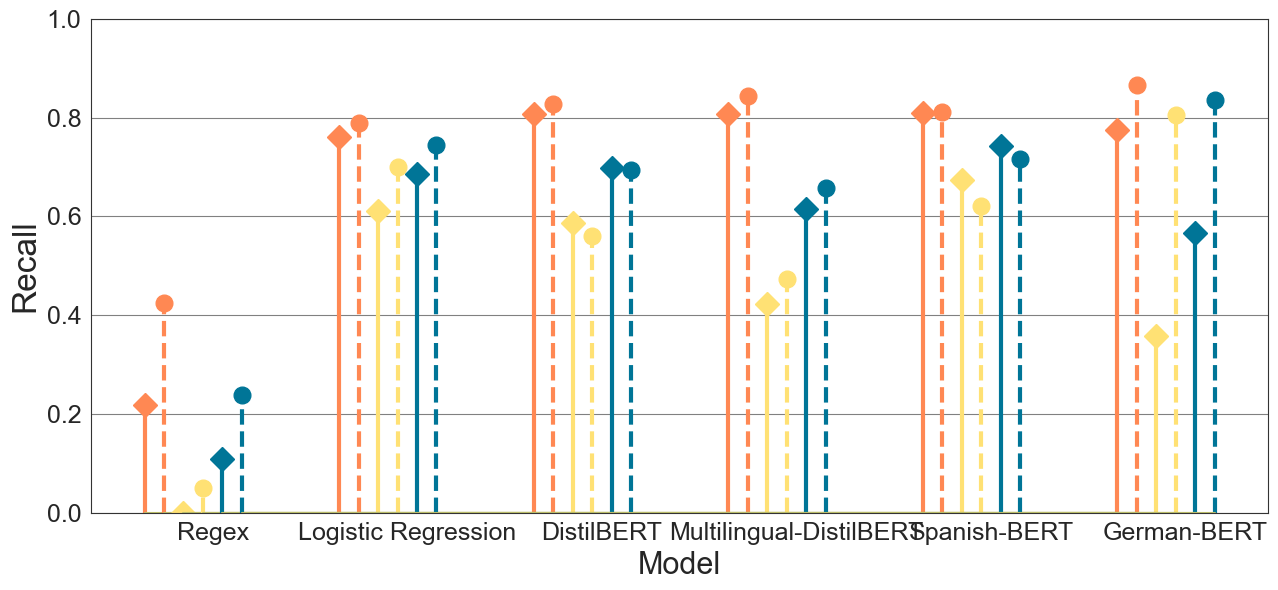

In [71]:
for i, metric in enumerate(["Precision", "Recall"]):

    fig, axes  = plt.subplots(figsize=(13,6), nrows = 1)
    start = 0
    for j, trait_name in enumerate(["Growth Form", "Life Form", "Average"]):
        for k, dataset in enumerate(["WIKI_ESP", "WIKI_DE"]):
            df_subset = df_results_full[(df_results_full["Trait Value"]==trait_name)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)]
            if(dataset=="WIKI_ESP"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(dataset=="WIKI_DE"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes.set_xticks(np.arange(3.5, 60, 10))
    axes.set_xticklabels(["Regex", "Logistic Regression", "DistilBERT", "Multilingual-DistilBERT", "Spanish-BERT", "German-BERT"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Model", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    if(i==0):
        plt.legend()
    # plt.xlim(-1.5, 64)
    # plt.legend()
    plt.tight_layout()
    plt.show()